<a href="https://colab.research.google.com/github/stevenmatthew31/InSight/blob/api/DWT_FFT_Librabry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/samples e0103.csv')

In [5]:
time = np.array(data['elapsed time'])[:75250] 
signal = np.array(data['V4'])[:75250]

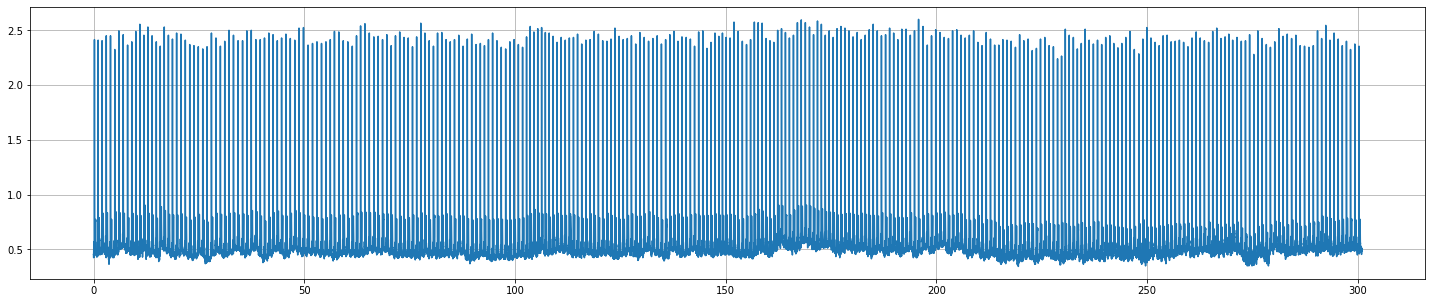

In [6]:
plt.figure(figsize = (25,5))
plt.plot(time, signal)
plt.grid()

## FFT

In [7]:
import math

In [8]:
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

def process(yy, fs):
    y = []
    for i in range(len(yy)):
        y.append(yy[i])
    leny = len(y)
    pangkat = math.ceil(math.log(leny, 2))
    sr1 = 2**pangkat
    for i in range (sr1-leny):
        y.append(0)
    
    yfft = FFT(y)
    N = len(yfft)
    n = np.arange(N)
    T = N/fs
    xfft = n/T 
    yfft = np.absolute(yfft)
    return xfft[:sr1//2], yfft[:sr1//2]

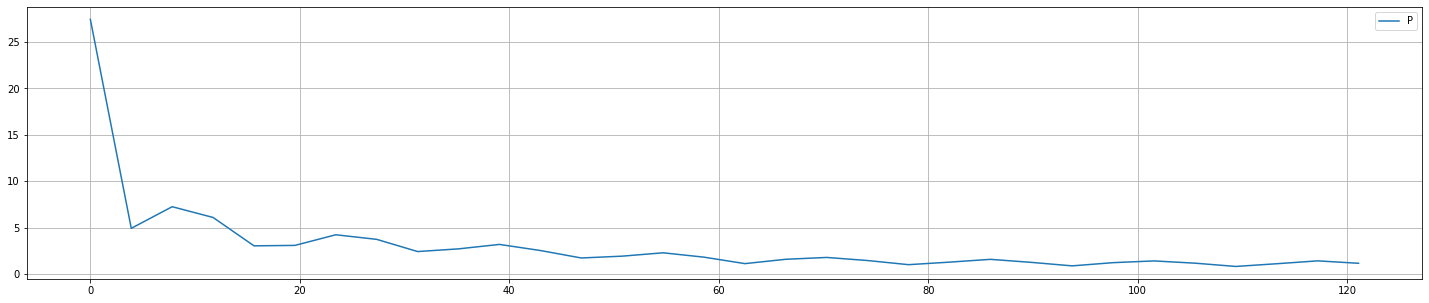

In [9]:
x_fft_p, y_fft_p = process(signal[:25], fs=250)
x_fft_qrs, y_fft_qrs = process(signal[52:100], fs=250)
x_fft_t, y_fft_t = process(signal[76:145], fs=250)
plt.figure(figsize = (25,5))
# plt.plot(x_fft_p, y_fft_p, x_fft_qrs, y_fft_qrs, x_fft_t, y_fft_t)
plt.plot(x_fft_qrs, y_fft_qrs)
plt.legend(['P', 'QRS', 'T'])
plt.grid()

In [10]:
def dirac(x):
    diracdelta = 1 if x == 0 else 0
  # if x == 0:
  #   diracdelta = 1
  # else:
  #   diracdelta = 0
    return diracdelta

In [11]:
g = [0] * 5
h = [0] * 5
Hw = [0] * len(signal)
Gw = [0] * len(signal)
fs = 256
for n in range (-2, 1):
    h[n] = 1/8*(dirac(n-1)+3*dirac(n)+3*dirac(n+1)+3*dirac(n+2))
    g[n] = -2*(dirac(n)-dirac(n+1))

for i in range (fs):
    reH = 0
    imH = 0
    reG = 0
    imG = 0
    for k in range (-1, 2):
        reG = reG + g[k]*np.cos(k*2*np.pi*i/fs)
        imG = imG - g[k]*np.sin(k*2*np.pi*i/fs)
        reH = reH + h[k]*np.cos(k*2*np.pi*i/fs)
        imH = imH - h[k]*np.sin(k*2*np.pi*i/fs)
    Hw[i] = np.sqrt((reH**2)+(imH**2));
    Gw[i] = np.sqrt((reG**2)+(imG**2));
xx = []
x = int(fs/2)
Q = np.zeros((9,128))
for i in range (x):
    xx.append(i)
    Q[1,i] = Gw[i]
    Q[2,i] = Gw[2*i]*Hw[i]
    Q[3,i] = Gw[4*i]*Hw[2*i]*Hw[i]
    Q[4,i] = Gw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[5,i] = Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[6,i] = Gw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[7,i] = Gw[64*i]*Gw[32*i]*Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[8,i] = Gw[128*i]*Gw[64*i]*Gw[32*i]*Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]

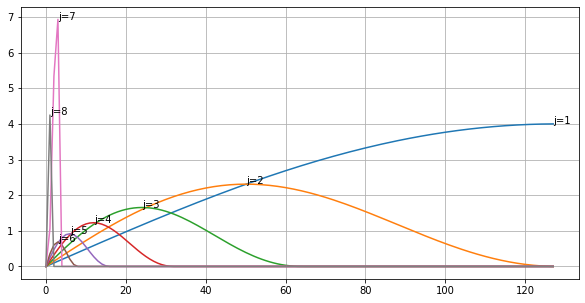

In [12]:
plt.figure(figsize = (10,5))
plt.plot(xx, Q[1], xx, Q[2], xx, Q[3], xx, Q[4], xx, Q[5], xx, Q[6], xx, Q[7], xx, Q[8])
plt.grid()

text = ['j=1', 'j=2', 'j=3', 'j=4', 'j=5', 'j=6', 'j=7', 'j=8']
for i in range(8):
    plt.text(xx[Q[i + 1].argmax()], np.max(Q[i + 1]), text[i])

In [13]:
# j = 1
# k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))), dtype = int)
# print(k)
# qj1 = np.zeros([j, len(k)], dtype = int)
# for index, x in enumerate(k):
#   qj1[j-1, index] = -2*(dirac(x)-dirac(x+1))
# print(qj1)

# plt.stem(k, qj1[0])
# plt.grid()

[-1  0]
[ 2. -2.]


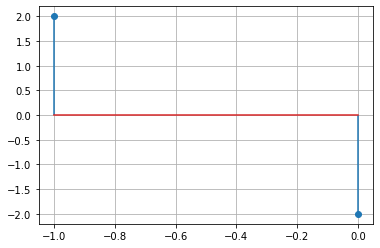

In [14]:
j = 1
k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
print(k)
qj1 = np.zeros((len(k)))
for index, x in enumerate(k):
    qj1[index] = -2*(dirac(x)-dirac(x+1))
print(qj1)

plt.stem(k, qj1)
plt.grid()

[-4 -3 -2 -1  0  1]
[ 0.25  0.75  0.5  -0.5  -0.75 -0.25]


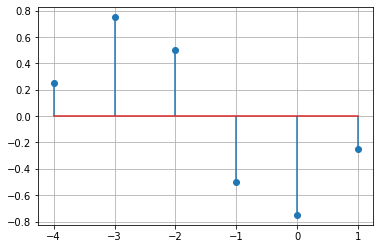

In [15]:
j = 2
k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
print(k)
qj2 = np.zeros((len(k)))
for index, x in enumerate(k):
    qj2[index] = -1/4*(dirac(x-1) + 3*dirac(x) + 2*dirac(x+1) - 2*dirac(x+2) - 3*dirac(x+3) - dirac(x+4))
#     qj2[index] = -1/4*(dirac(x+1) + 3*dirac(x) + 2*dirac(x-1) - 2*dirac(x-2) - 3*dirac(x-3) - dirac(x-4))
print(qj2)

plt.stem(k, qj2)
plt.grid()

[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] 14
[-0.03125 -0.09375 -0.1875  -0.3125  -0.34375 -0.28125 -0.125    0.125
  0.28125  0.34375  0.3125   0.1875   0.09375  0.03125]


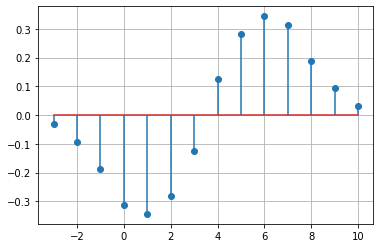

In [16]:
j = 3
# k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
k = np.arange((1-round(2**(j-1))), (round(2**(j))+round(2**(j-1))-2)+ 1)
print(k, len(k))
qj3 = np.zeros((len(k)))
for index, x in enumerate(k):
#     qj3[index] = -1/32*(dirac(x-3) + 3*dirac(x-2) + 6*dirac(x-1) + 10*dirac(x) + 11*dirac(x+1) + 9*dirac(x+2) + 4*dirac(x+3) - 4*dirac(x+4) - 9*dirac(x+5) - 11*dirac(x+6) - 10*dirac(x+7) - 6*dirac(x+8) - 3*dirac(x+9) - dirac(x+10))
    qj3[index] = -1/32*(dirac(x+3) + 3*dirac(x+2) + 6*dirac(x+1) + 10*dirac(x) + 11*dirac(x-1) + 9*dirac(x-2) + 4*dirac(x-3) - 4*dirac(x-4) - 9*dirac(x-5) - 11*dirac(x-6) - 10*dirac(x-7) - 6*dirac(x-8) - 3*dirac(x-9) - dirac(x-10))
print(qj3)

plt.stem(k, qj3)
plt.grid()

In [17]:
def delay(j):
    T = round((2**(j-1))) - 1
    return T

In [18]:
ndata = len(signal)
ndata

75250

In [19]:
w2fb1 = np.zeros(ndata + delay(1))
w2fb2 = np.zeros(ndata + delay(2))
w2fb3 = np.zeros(ndata + delay(3))

Text(0.5, 1.0, 'ECG Signal with Decomposition 1')

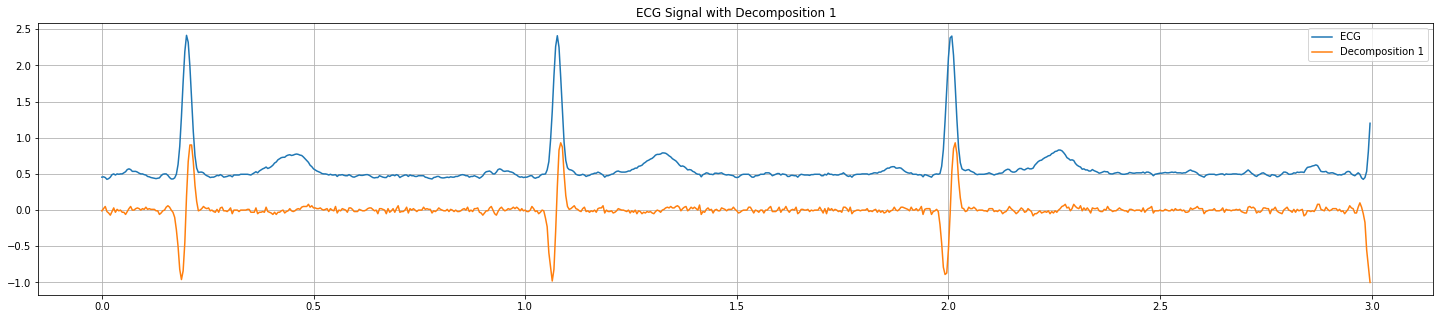

In [20]:
for n in range(ndata - 1):
    w2fb1[n + delay(1)] = 0
    j = 1
    k_temp = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb1[n + delay(1)] += qj1[x] * signal[min(ndata - 1, n - x)]

plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb1[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 1'])
plt.title('ECG Signal with Decomposition 1')

Text(0.5, 1.0, 'ECG Signal with Decomposition 2')

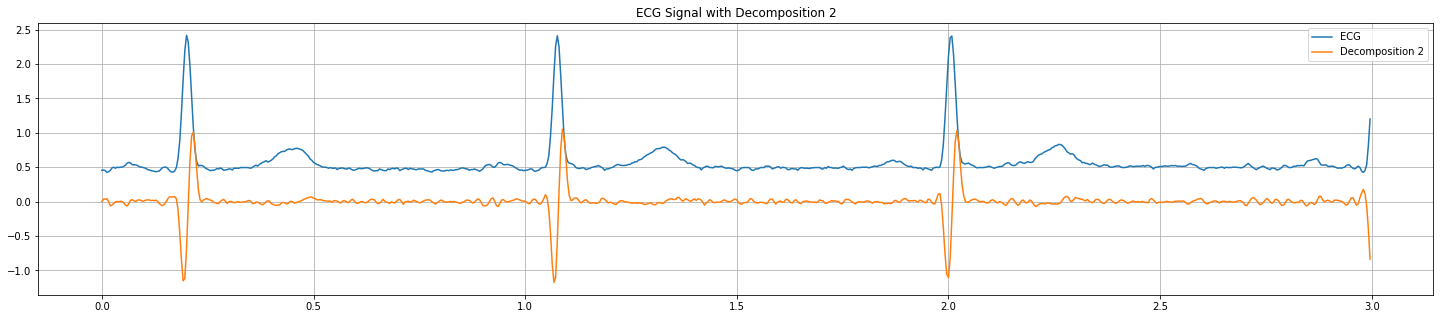

In [21]:
for n in range(ndata - 1):
    w2fb2[n + delay(2)] = 0
    j = 2
    k_temp = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb2[n + delay(2)] += qj2[x] * signal[min(ndata - 1, n - x)]

plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb2[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 2'])
plt.title('ECG Signal with Decomposition 2')

Text(0.5, 1.0, 'ECG Signal with Decomposition 3')

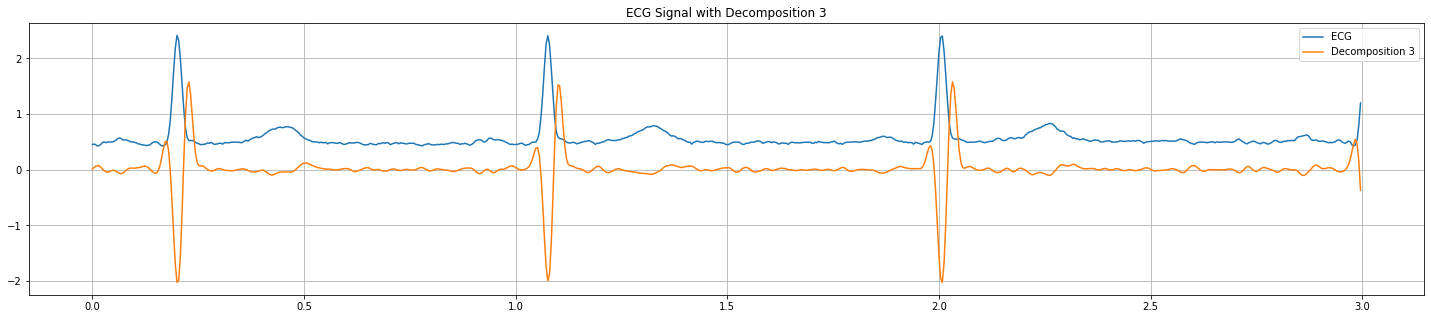

In [22]:
for n in range(ndata - 1):
    w2fb3[n + delay(3)] = 0.0
    j = 3
#     k_temp3 = np.arange(-(round(2**(j))+round(2**(j-1))-2), -(1-round(2**(j-1))) + 1)
    k_temp3 = np.arange((1-round(2**(j-1))), (round(2**(j))+round(2**(j-1))-2)+1)
    for x in (k_temp3):
        w2fb3[n - delay(3)] += qj3[x] * signal[min(ndata - 1, n - x)]

plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb3[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 3'])
plt.title('ECG Signal with Decomposition 3')

Text(0.5, 1.0, 'ECG Signal with Decomposition 1 - 3')

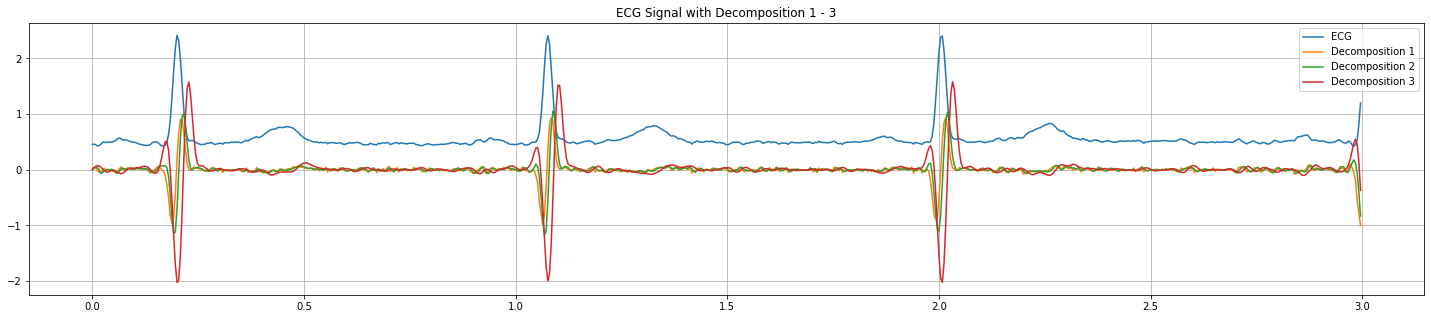

In [23]:
plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb1[:750], time[:750], w2fb2[:750], time[:750], w2fb3[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 1', 'Decomposition 2', 'Decomposition 3'])
plt.title('ECG Signal with Decomposition 1 - 3')

In [24]:
gradien1 = np.zeros(ndata)
gradien2 = np.zeros(ndata)
gradien3 = np.zeros(ndata)

# hasil1 = np.zeros(ndata)
# hasil2 = np.zeros(ndata)
# hasil3 = np.zeros(ndata)
hasil_qrs = np.zeros(ndata)

In [25]:
for n in range(ndata - 1):
    gradien1[n] = w2fb1[n + 1] - w2fb1[n]
    gradien2[n] = w2fb2[n + 2] - w2fb2[n]
    gradien3[n] = w2fb3[n + 3] - w2fb3[n]
    hasil_qrs[n] = (gradien1[n]>0.2 and gradien2[n]>0.5 and gradien3[n]>0.9)*1

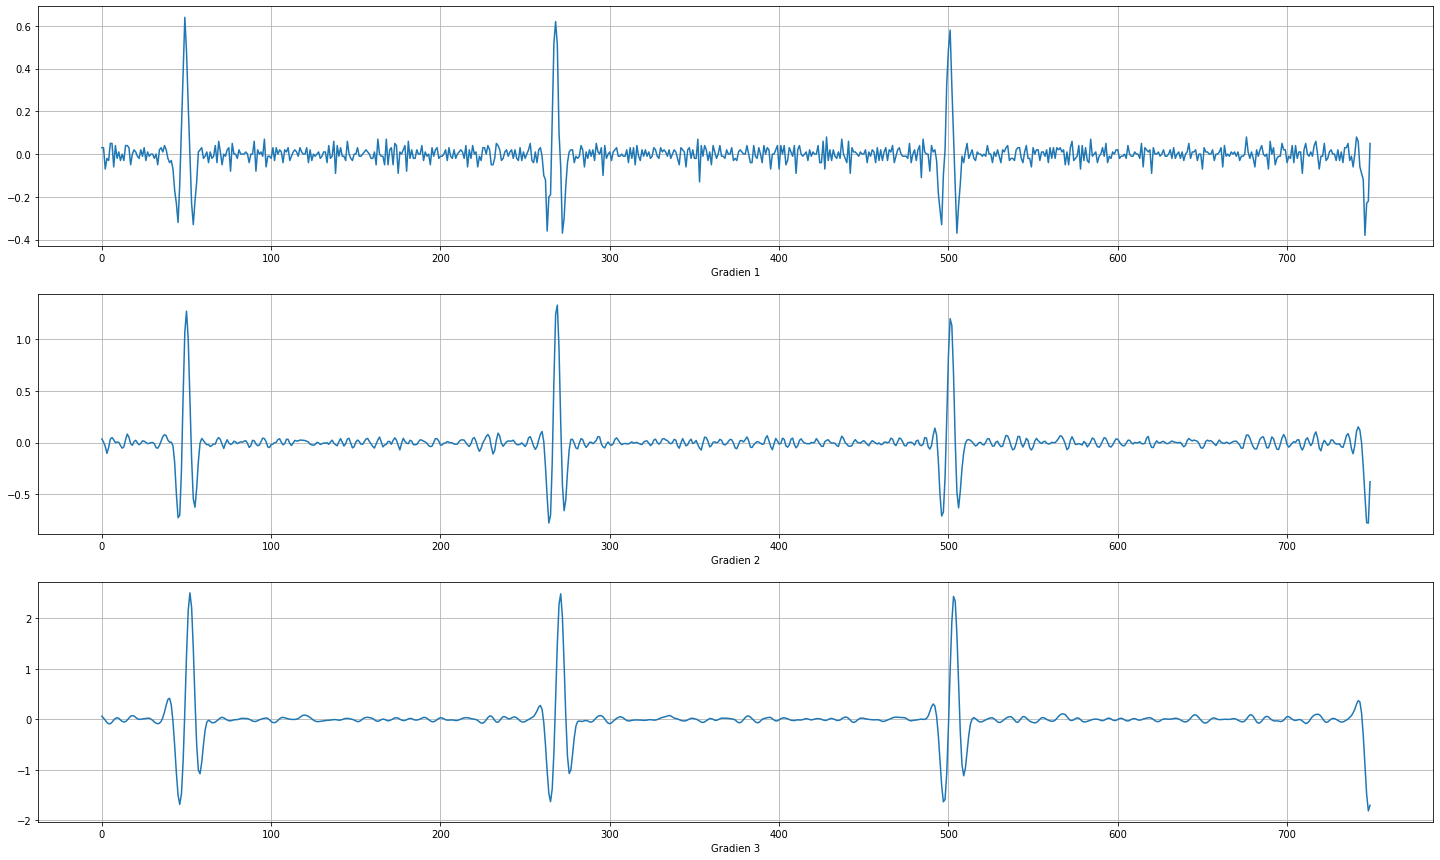

In [26]:
# for n in range(ndata-1):
#     gradien1[n] = w2fb1[n + 1] - w2fb1[n]
#     gradien2[n] = w2fb2[n + 2] - w2fb2[n]
#     gradien3[n] = w2fb3[n + 3] - w2fb3[n]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (25,15))
ax1.plot(gradien1[:750])
ax2.plot(gradien2[:750])
ax3.plot(gradien3[:750])
ax1.set_xlabel('Gradien 1')
ax2.set_xlabel('Gradien 2')
ax3.set_xlabel('Gradien 3')
ax1.grid()
ax2.grid()
ax3.grid()

In [27]:
# for n in range(ndata - 1):
#     if gradien1[n] > 0.2 :
#         hasil1[n] = 1
#     else:
#         hasil1[n] = 0

#     if gradien2[n] > 0.5 :
#         hasil2[n] = 1
#     else:
#         hasil2[n] = 0

#     if gradien3[n] > 0.9 :
#         hasil3[n] = 1
#     else:
#         hasil3[n] = 0

#     hasil_qrs[n] = hasil1[n] and hasil2[n] and hasil3[n]

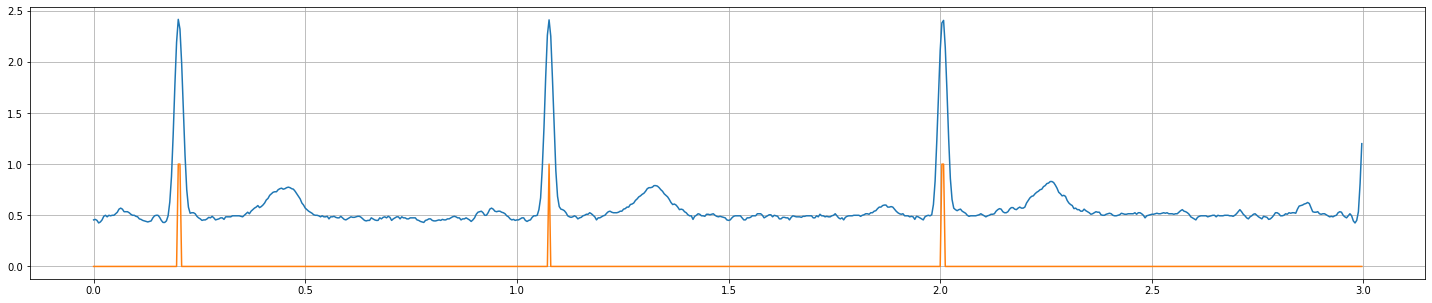

In [28]:
plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], hasil_qrs[:750])
plt.grid()

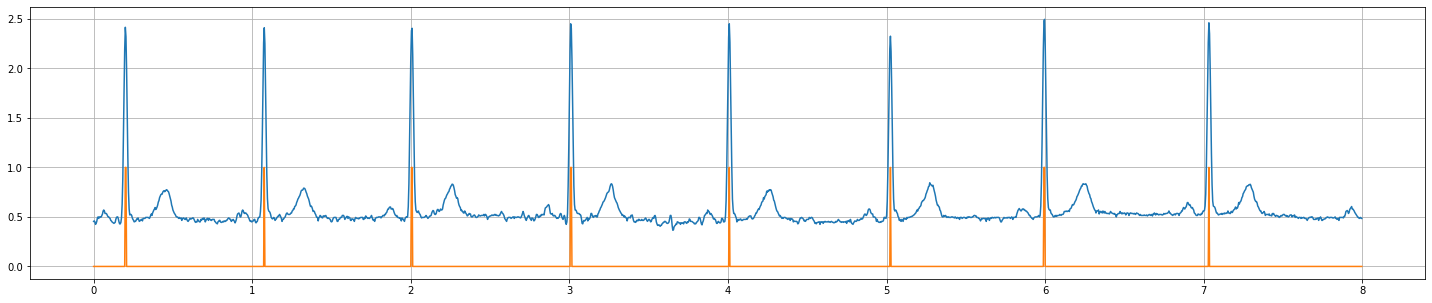

In [29]:
plt.figure(figsize = (25,5))
plt.plot(time[:2000], signal[:2000], time[:2000], hasil_qrs[:2000])
plt.grid()

In [30]:
def rrinterval(tsignal, fs=250):
    t = 1/fs
    k = []
    for i in range(tsignal.size-1):
        if tsignal[i] == 0 and tsignal[i+1] == 1:
            k.append(i)
    
    rri = []
    for i in range(1, len(k)):
        rri.append(k[i]*t - k[i-1]*t)
    
    return np.array(rri)


In [31]:
rri = rrinterval(hasil_qrs)
print(rri[0], rri[1], len(rri))

0.8760000000000001 0.9279999999999999 304


### RMSSD

In [32]:
def rri_diff(rr):
  rrd = np.zeros(rri.size - 1)

  for i in range(rri.size - 1):
      rrd[i] = abs(rri[i + 1] - rri[i])

  return rrd

In [33]:
def rmssd(rr):
    rrd = rri_diff(rr)
    
    _rmssd = np.sum([x**2 for x in rrd])
    _rmssd = np.sqrt(_rmssd / (ndata - 1))
    
    return _rmssd

In [34]:
value_rmssd = rmssd(rri)
print("RMSSD : ", value_rmssd)

RMSSD :  0.0019229120275396617


### pNN50

In [35]:
def rri_format(rr):
    if np.max(rr) < 10:
        rr_ = np.asarray(rr, dtype='float64')
        rr_ *= 1000
        return rr_
    return rr

In [36]:
def nnXX(rr, threshold):
    rr = rri_format(rr)
    rrd = rri_diff(rr)
    nnxx = np.sum(i > threshold for i in rrd)
    pnnxx = ((nnxx) / (ndata - 1)) * 100
    return nnxx, pnnxx

def nn50(rr):
    return nnXX(rr, 50)

In [37]:
nn50, pnn50 = nn50(rri)
print("NN50 & pNN50 : ",nn50, pnn50)

NN50 & pNN50 :  30 0.03986763943706893


<ipython-input-36-e3c29c86bac4>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  nnxx = np.sum(i > threshold for i in rrd)


### SDANN

In [38]:
def segmentation(rri, duration=300):
    rri = rri_format(rri)
    max_time = np.sum(rri)
    duration *= 1000 # to miliseconds

    if np.sum(rri) > duration:
        segments = []
        limit = int(np.ceil((max_time + duration)/duration))
        index = 0

        for i, _ in enumerate(range(0, limit - 1)):
            current_segment = []
            while(np.sum(current_segment) < duration):
                current_segment.append(rri[index])
                if index < rri.size - 1:
                    index += 1
                else:
                    break
            
            # just in case it's more than the duration
            if (np.sum(current_segment) > duration):
                current_segment = current_segment[:-1]
                index -= 1

            segments.append(list(current_segment))
        
        return segments
    else:
        return np.asarray([])

def std(array, dof=1):
    array = np.asarray(array)
    result = np.sum([(x - np.mean(array))**2 for x in array])
    result = np.sqrt(1. / (array.size - dof) * result)
    return result

In [39]:
def sdann(rr):
    segments = segmentation(rr)
    if len(segments) != 0:
        mean_values = [np.mean(x) for x in segments]
        sdann_ = std(mean_values, 1)
    else:
        sdann_ = -1000
    return sdann_

In [40]:
sdann = sdann(rri)
print("SDANN : ",sdann)

SDANN :  13.250667668571868


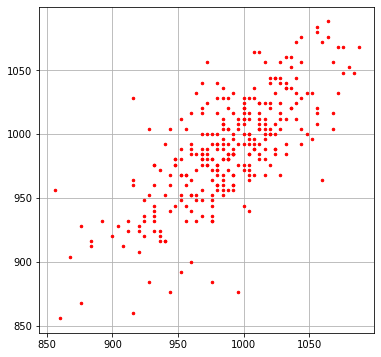

In [41]:
plt.figure(figsize = (6, 6))
for n in range(len(rri)):
    plt.plot(rri[n - 1], rri[n], 'ro', markersize=2.5)
plt.grid()

In [42]:
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 KB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp38-cp38-linux_x86_64.whl size=237782 sha256=f12562257d8cb5ad10b45850268fbbca90aca7d8f3eba5da7987aeefcc40cf19
  Stored in directory: /root/.cache/pip/wheels/8f/2c/22/4a514eb971c5f4693506f55ff7ff43fd501495322cb0b92464
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64216 sha256=219141b6c5fa69658e612aa2ec9a8be2ff47bbf5742adcda9fd5a5aca592749f
  Stored in directory: /root/.cache/pip/wheels/ed/f7/20/2b6bbee53a7f66bb2

In [43]:
import pyhrv
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl

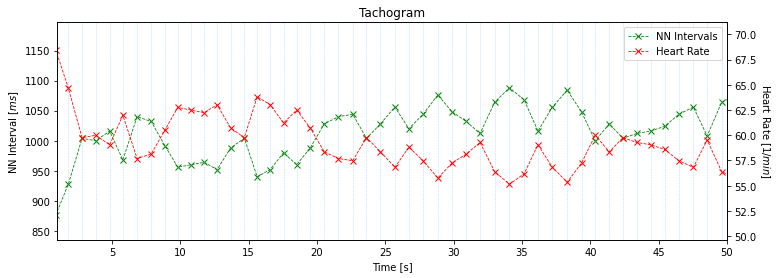

ReturnTuple(tachogram_plot=<Figure size 864x288 with 2 Axes>)

In [44]:
pyhrv.tools.tachogram(rri, interval = [1, 50])

In [45]:
results = td.rmssd(rri)
print(results['rmssd'])

30.30319831936622


In [46]:
results = td.sdann(rri)
print(results['sdann'])

13.250667668571868


In [47]:
results50 = td.nn50(rri)
print(results50['pnn50'])

9.900990099009901


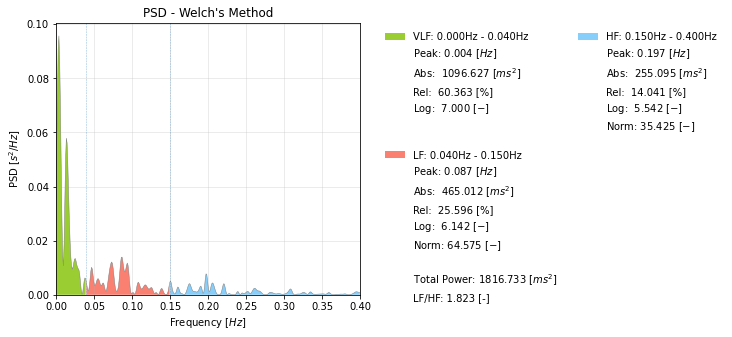

(64.57540484729853, 35.424595152701464)


In [48]:
result = fd.welch_psd(rri, window='hanning')
print(result['fft_norm'])

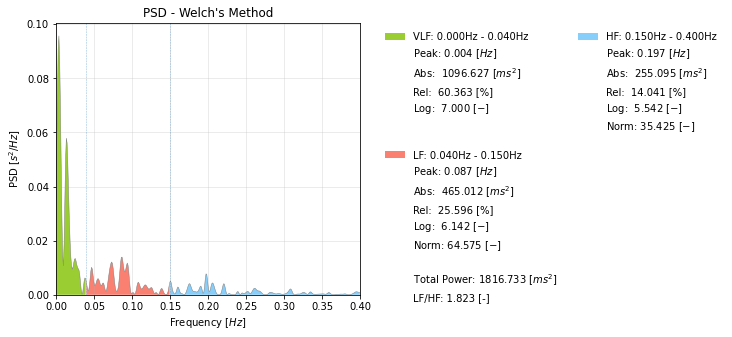

(1096.6265920336537, 465.01157549553324, 255.0947507367934)


In [49]:
result = fd.welch_psd(rri, window='hanning')
print(result['fft_abs'])

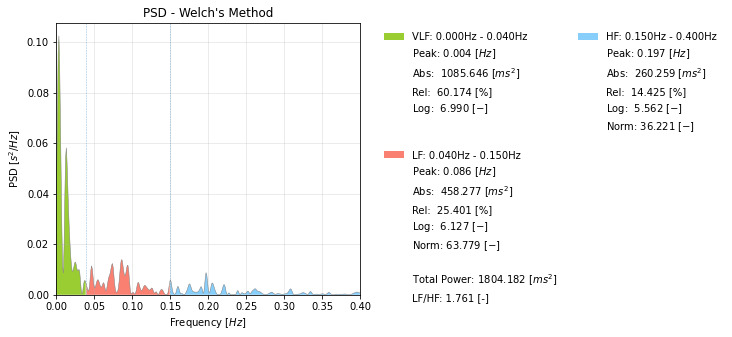

1.7608495221200635


In [ ]:
result = fd.welch_psd(rri)
print(result['fft_ratio'])

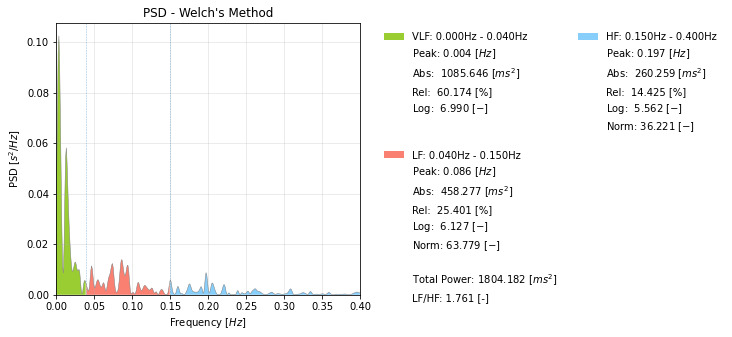

1804.1815182389032


In [ ]:
result = fd.welch_psd(rri)
print(result['fft_total'])

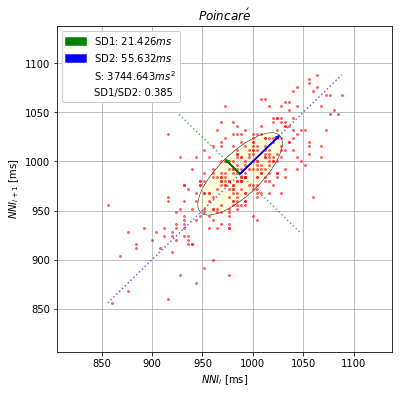

21.425766975944345
55.631937210368534


In [ ]:
results = nl.poincare(rri)
print(results['sd1'])
print(results['sd2'])